<a href="https://colab.research.google.com/github/AARSHGHEWDE/ML/blob/master/EXP_7_J067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical

# COVTYPE

In [ ]:
forest = fetch_covtype()
x = forest.data
y = forest.target

In [ ]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
print(x.shape)
print(y.shape)

(581012, 54)
(581012, 1)


In [ ]:
y1 = y.replace([1,2,3,4,5,6,7], [0,1,2,3,4,5,6])
y1 = to_categorical(y1)
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(464809, 54)
(58101, 54)
(58102, 54)
(464809, 7)
(58101, 7)
(58102, 7)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(1024, activation = 'relu', input_shape = (54, )))
nn.add(layers.Dense(512, activation = 'relu'))
nn.add(layers.Dense(256, activation = 'relu'))
nn.add(layers.Dense(128, activation = 'relu'))
nn.add(layers.Dense(54, activation = 'relu'))
nn.add(layers.Dense(7, activation = 'softmax'))
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = nn.fit(x_train, y_train, epochs = 100, batch_size = 5000, validation_data = (x_dev, y_dev))

Epoch 1/100
93/93 [==============================] - 1s 13ms/step - loss: 18.5878 - accuracy: 0.4069 - val_loss: 2.5094 - val_accuracy: 0.5183
Epoch 2/100
93/93 [==============================] - 1s 9ms/step - loss: 1.8456 - accuracy: 0.4616 - val_loss: 1.2303 - val_accuracy: 0.5119
Epoch 3/100
93/93 [==============================] - 1s 9ms/step - loss: 1.0084 - accuracy: 0.5550 - val_loss: 0.9582 - val_accuracy: 0.5712
Epoch 4/100
93/93 [==============================] - 1s 9ms/step - loss: 0.9634 - accuracy: 0.5819 - val_loss: 0.8712 - val_accuracy: 0.6066
Epoch 5/100
93/93 [==============================] - 1s 9ms/step - loss: 0.8473 - accuracy: 0.6229 - val_loss: 0.8774 - val_accuracy: 0.6058
Epoch 6/100
93/93 [==============================] - 1s 9ms/step - loss: 0.7912 - accuracy: 0.6482 - val_loss: 0.8228 - val_accuracy: 0.6245
Epoch 7/100
93/93 [==============================] - 1s 9ms/step - loss: 0.7307 - accuracy: 0.6737 - val_loss: 0.6585 - val_accuracy: 0.7170
Epoch 8/100

In [ ]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is',dev_acc)

1816/1816 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.8848
The dev accuracy is 0.88478684425354


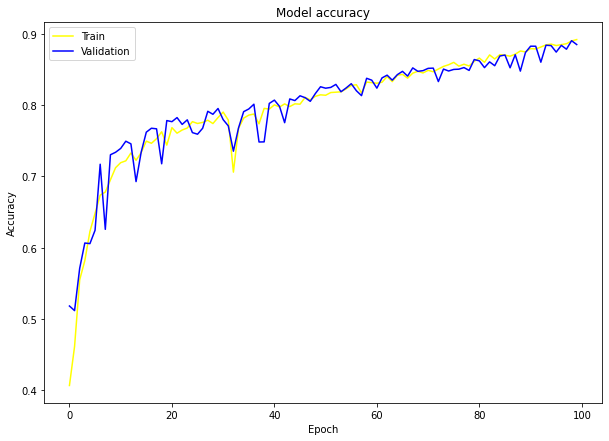

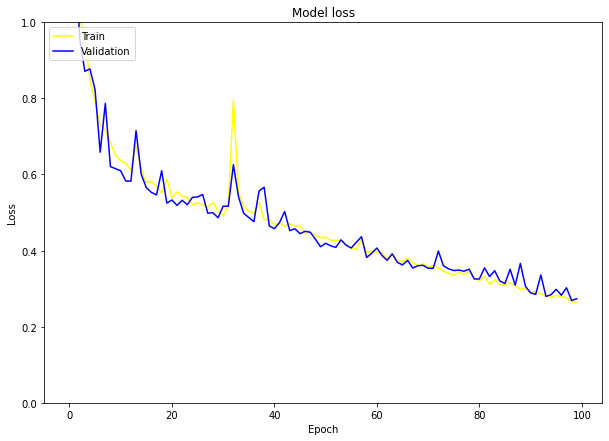

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# KDDCUP99

In [ ]:
kddcup99 = fetch_kddcup99()
x = kddcup99.data
y_fetch = kddcup99.target

In [ ]:
x = pd.DataFrame(x)
y = pd.DataFrame(y_fetch)
print(x.shape)
print(y.shape)

(494021, 41)
(494021, 1)


In [ ]:
le = LabelEncoder()
for i in [1,2,3]:
  x[i] = [j.decode('utf-8') for j in x[i]]
  x[i] = le.fit_transform(x[i])

for i in range(x.shape[1]):
  x[i] = x[i].astype('float')

In [ ]:
y = [i.decode('utf-8') for i in y_fetch]
y = pd.DataFrame(le.fit_transform(y))

In [ ]:
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)


(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(1024, activation = 'relu', input_shape = (41, )))
nn.add(layers.Dense(512, activation = 'relu'))
nn.add(layers.Dense(256, activation = 'relu'))
nn.add(layers.Dense(128, activation = 'relu'))
nn.add(layers.Dense(54, activation = 'relu'))
nn.add(layers.Dense(23, activation = 'softmax'))
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = nn.fit(x_train, y_train, epochs = 20, batch_size = 1500, validation_data = (x_dev, y_dev))

Epoch 1/20
264/264 [==============================] - 2s 6ms/step - loss: 11.2379 - accuracy: 0.9427 - val_loss: 3.4232 - val_accuracy: 0.9785
Epoch 2/20
264/264 [==============================] - 1s 4ms/step - loss: 3.1439 - accuracy: 0.9740 - val_loss: 1.5743 - val_accuracy: 0.9908
Epoch 3/20
264/264 [==============================] - 1s 4ms/step - loss: 0.4483 - accuracy: 0.9867 - val_loss: 0.3956 - val_accuracy: 0.9919
Epoch 4/20
264/264 [==============================] - 1s 5ms/step - loss: 0.3910 - accuracy: 0.9901 - val_loss: 0.5235 - val_accuracy: 0.9921
Epoch 5/20
264/264 [==============================] - 1s 4ms/step - loss: 0.4584 - accuracy: 0.9883 - val_loss: 0.3396 - val_accuracy: 0.9932
Epoch 6/20
264/264 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.9885 - val_loss: 0.7296 - val_accuracy: 0.9951
Epoch 7/20
264/264 [==============================] - 1s 5ms/step - loss: 0.2581 - accuracy: 0.9915 - val_loss: 0.1585 - val_accuracy: 0.9971
Epoch

In [ ]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', dev_acc)

1544/1544 [==============================] - 3s 2ms/step - loss: 0.0175 - accuracy: 0.9988
The dev accuracy is 0.9988057017326355


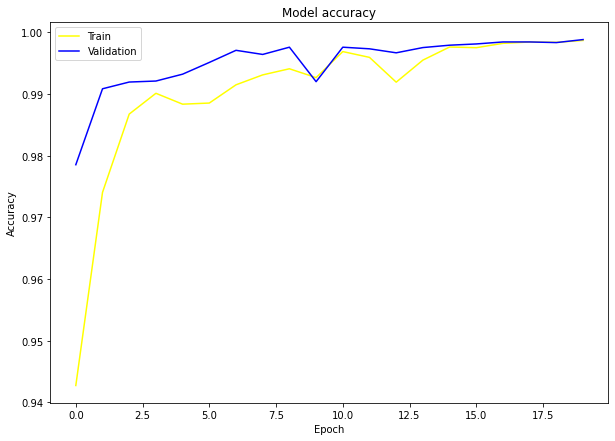

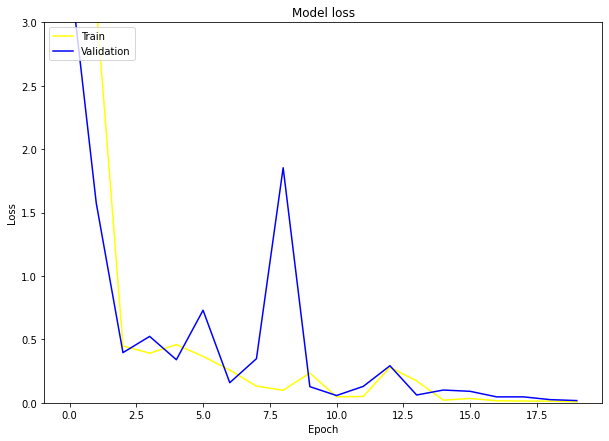

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# BREAST CANCER

In [ ]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [ ]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
print(x.shape)
print(y.shape)

(569, 30)
(569, 1)


In [ ]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x, y, test_size = 0.5, shuffle = True)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(455, 30)
(284, 30)
(285, 30)
(455, 1)
(284, 1)
(285, 1)


In [ ]:
nn= models.Sequential()
nn.add(layers.Dense(256, activation = 'relu', input_shape = (30, )))
nn.add(layers.Dense(128, activation = 'relu'))
nn.add(layers.Dense(64, activation = 'relu'))
nn.add(layers.Dense(1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = nn.fit(x_train, y_train, epochs = 20, validation_data = (x_dev, y_dev))

Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 0.3232 - accuracy: 0.8791 - val_loss: 0.1228 - val_accuracy: 0.9542
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0853 - accuracy: 0.9736 - val_loss: 0.0853 - val_accuracy: 0.9718
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9824 - val_loss: 0.0606 - val_accuracy: 0.9894
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0435 - accuracy: 0.9934 - val_loss: 0.0521 - val_accuracy: 0.9930
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9912 - val_loss: 0.0486 - val_accuracy: 0.9894
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0286 - accuracy: 0.9934 - val_loss: 0.0452 - val_accuracy: 0.9894
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0377 - val_accuracy: 0.9894
Epoch 8/20
15/15 [=

In [ ]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', dev_acc)

9/9 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9965
The dev accuracy is 0.9964788556098938


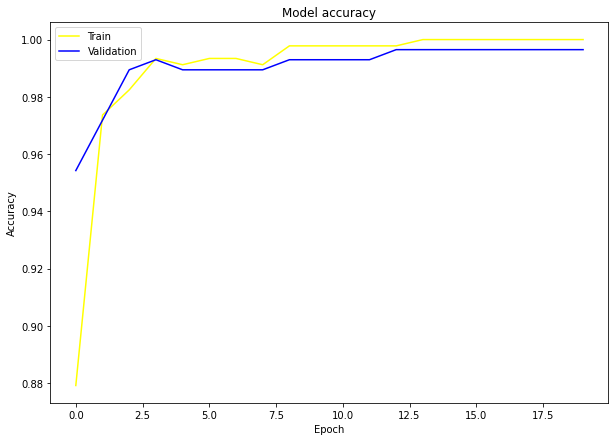

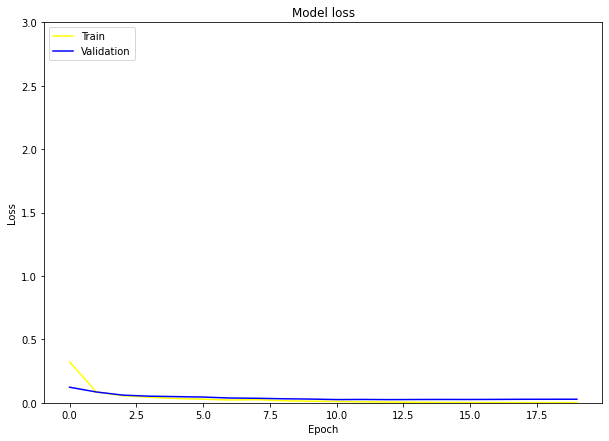

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# WINE 

In [ ]:
wine = load_wine()
x = wine.data
y = wine.target

In [ ]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)
print(x.shape)
print(y.shape)

(178, 13)
(178, 1)


In [ ]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [ ]:
y1 = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2, shuffle = True)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(142, 13)
(18, 13)
(18, 13)
(142, 3)
(18, 3)
(18, 3)


In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(64, activation = 'relu', input_shape = (13, )))
nn.add(layers.Dense(32, activation = 'relu'))
nn.add(layers.Dense(3, activation = 'sigmoid'))
nn.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = nn.fit(x_train, y_train, epochs = 100, validation_data = (x_dev, y_dev))

Epoch 1/100
5/5 [==============================] - 0s 27ms/step - loss: 1.0796 - accuracy: 0.4507 - val_loss: 1.0317 - val_accuracy: 0.6111
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0690 - accuracy: 0.4718 - val_loss: 1.0227 - val_accuracy: 0.6667
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0586 - accuracy: 0.5000 - val_loss: 1.0143 - val_accuracy: 0.7222
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0486 - accuracy: 0.5211 - val_loss: 1.0061 - val_accuracy: 0.7778
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0386 - accuracy: 0.5423 - val_loss: 0.9978 - val_accuracy: 0.7778
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0292 - accuracy: 0.5493 - val_loss: 0.9895 - val_accuracy: 0.8333
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 1.0196 - accuracy: 0.6268 - val_loss: 0.9812 - val_accuracy: 0.8333
Epoch 8/100
5/5 [=========

In [ ]:
dev_acc = nn.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', dev_acc)

1/1 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 1.0000
The dev accuracy is 1.0


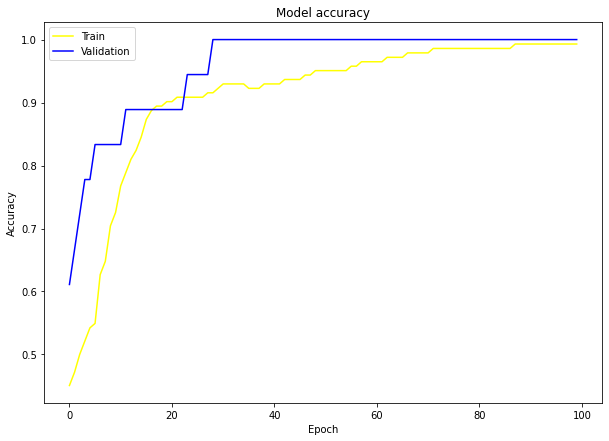

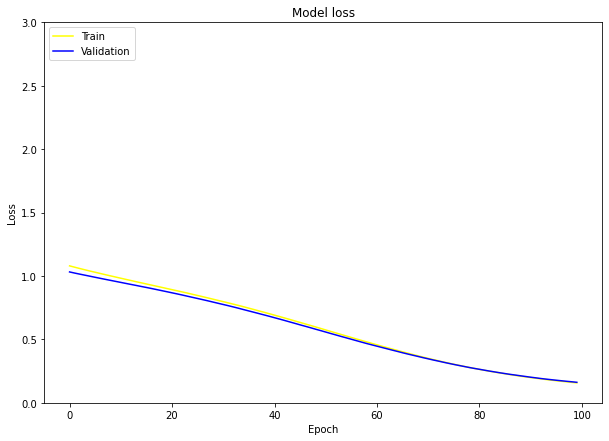

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'yellow')
plt.plot(history.history['val_accuracy'], color = 'blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'yellow')
plt.plot(history.history['val_loss'], color = 'blue')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()